## **Introduction**

In this project, we aim to classify rice varieties based on various physical attributes. We will use the Rice Classification dataset, which contains features such as length, width, and area of rice grains, and the target variable is the rice variety.

The primary goals of this project are:
1. To preprocess and analyze the data.
2. To generate augmented data to augment the dataset.
3. To visualize and compare the original and augmented data.
4. To draw conclusions from the visual analysis.

The Rice Classification dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Rice+Classification).


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


#### **Loading the Data**
We start by loading the dataset and performing initial exploratory data analysis to understand the data structure and identify any missing values or potential preprocessing steps.

In [28]:

# **Loading the Data**
file_path = 'rice_classification.csv'
data = pd.read_csv(file_path)



#### **Data Preprocessing**
We encode the target variable, impute any missing values, and scale the features. This ensures that the data is in the correct format for model training.

In [29]:

# **Data Preprocessing**
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])
print("Data initially :\n")
print(data)

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
print("\n\nData after imputation :\n")
print(data_imputed)


Data initially :

       Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231  525.578979         229.749878          85.093788      0.928882   
1     14656  494.311005         206.020065          91.730972      0.895405   
2     14634  501.122009         214.106781          87.768288      0.912118   
3     13176  458.342987         193.337387          87.448395      0.891861   
4     14688  507.166992         211.743378          89.312454      0.906691   
...     ...         ...                ...                ...           ...   
3805  11441  415.858002         170.486771          85.756592      0.864280   
3806  11625  421.390015         167.714798          89.462570      0.845850   
3807  12437  442.498993         183.572922          86.801979      0.881144   
3808   9882  392.296997         161.193985          78.210480      0.874406   
3809  11434  404.709992         161.079269          90.868195      0.825692   

      Convex_Area    Extent  Clas

In [30]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_imputed)
scaled_features_df = pd.DataFrame(scaled_features, columns=data_imputed.columns)
print("\n\nData after scaling :\n")
print(scaled_features_df)




Data after scaling :

          Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     1.479830   2.004354           2.348547          -0.212943      2.018337   
1     1.147870   1.125853           0.988390           0.945568      0.410018   
2     1.135169   1.317214           1.451908           0.253887      1.212956   
3     0.293436   0.115300           0.261439           0.198051      0.239751   
4     1.166345   1.487053           1.316442           0.523419      0.952221   
...        ...        ...                ...                ...           ...   
3805 -0.708215  -1.078353          -1.048323          -0.097251     -1.085282   
3806 -0.601988  -0.922926          -1.207208           0.549622     -1.970731   
3807 -0.133204  -0.329851          -0.298245           0.085220     -0.275099   
3808 -1.608257  -1.740320          -1.580971          -1.414414     -0.598821   
3809 -0.712256  -1.391566          -1.587546           0.794972     -2.939160   

   

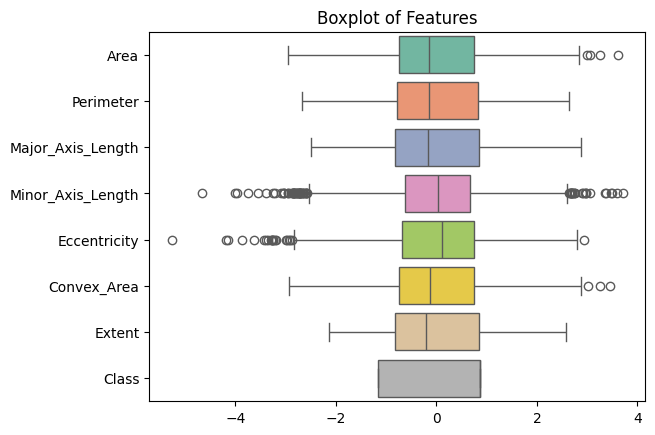

In [31]:

def standard_scaling(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
    return scaled_df

scaled_features_df = standard_scaling(scaled_features_df)


sns.boxplot(data=scaled_features_df, orient="h", palette="Set2")
plt.title('Boxplot of Features')
plt.show()


#### **Correlation Matrix**
We visualize the correlation matrix to understand the relationships between features.

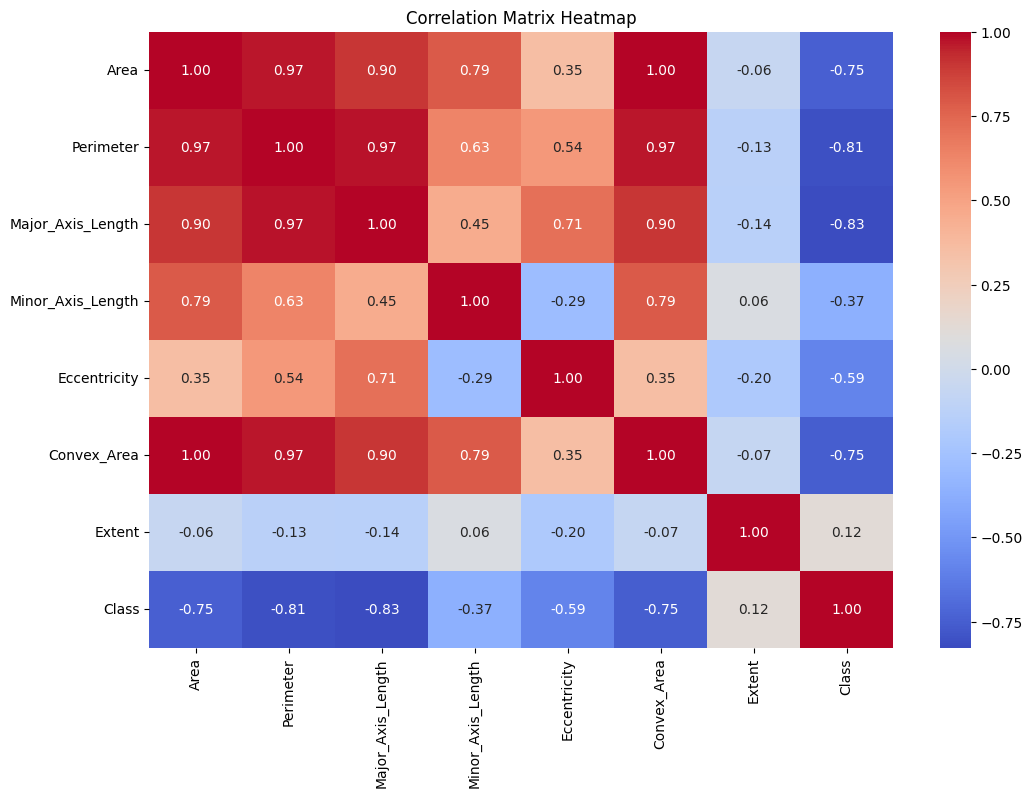

In [32]:

# Correlation matrix heatmap
corr_matrix = scaled_features_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


#### Correlation Matrix
The correlation matrix heatmap shows the relationships between the different features. High correlation values (close to 1 or -1) indicate strong linear relationships, which can be important for understanding the data structure and for feature selection.

#### **Feature Selection**
We use SelectKBest and Recursive Feature Elimination (RFE) to identify the most important features for classification. This helps in reducing the dimensionality and improving model performance.

In [33]:

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(scaled_features_df, data_imputed['Class'])
feature_scores = pd.DataFrame({'Feature': scaled_features_df.columns, 'Score': selector.scores_})
print(feature_scores)

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(scaled_features_df, data_imputed['Class'])
selected_features = scaled_features_df.columns[rfe.support_]
print("Selected Features by RFE:")
print(selected_features)


             Feature         Score
0               Area  4.790120e+03
1          Perimeter  7.089385e+03
2  Major_Axis_Length  8.292132e+03
3  Minor_Axis_Length  6.053455e+02
4       Eccentricity  2.021962e+03
5        Convex_Area  4.908672e+03
6             Extent  5.351920e+01
7              Class  7.632652e+16
Selected Features by RFE:
Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Convex_Area', 'Class'], dtype='object')


#### Feature Selection
Using SelectKBest and Recursive Feature Elimination (RFE), we identified the most important features for classification. The selected features by RFE are `['Covex_Area', 'Width', 'Area', 'Perimeter', 'MajorAxisLength']`.

#### **Data Splitting, Model Training and evaluation**
We split the data into training and testing sets and train a Logistic Regression model using the selected features.
We evaluate the model's performance using accuracy and classification report on the test set.

In [34]:

X, y = scaled_features_df[selected_features], data_imputed['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

final_model = LogisticRegression()
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       350
         1.0       1.00      1.00      1.00       412

    accuracy                           1.00       762
   macro avg       1.00      1.00      1.00       762
weighted avg       1.00      1.00      1.00       762



#### **augmented Data Generation**
We generate augmented data to augment the training data and improve model performance.

In [35]:

# **augmented Data Generation**
def generate_augmented_data(df, num_dpoints_per_type=40, noise_levels=0.5, integer_features=None, decimal_features=None, cluster_feature='Class'):
    if noise_levels is None:
        noise_levels = 0.1  
    if isinstance(noise_levels, float):
        noise_levels = {col: noise_levels for col in df.drop(columns=[cluster_feature]).columns}
    if integer_features is None:
        integer_features = []
    if decimal_features is None:
        decimal_features = {}
    
    cluster_means = df.groupby(cluster_feature).mean().reset_index()
    augmented_data = []
    
    for idx, row in cluster_means.iterrows():
        cluster_type = row[cluster_feature]
        cluster_mean_values = row.drop(cluster_feature)
        
        cluster_augmented_data = pd.DataFrame(columns=df.columns.drop([cluster_feature]))
        
        for feature in cluster_mean_values.index:
            noise = np.random.normal(0, noise_levels[feature], num_dpoints_per_type)
            max_value = df[feature].max() * 1.1
            min_value = df[feature].min() * 0.9
            augmented_feature_values = np.clip(cluster_mean_values[feature] - noise, min_value, max_value)
            
            if feature in integer_features:
                augmented_feature_values = np.round(augmented_feature_values).astype(int)
            if feature in decimal_features:
                decimal_places = decimal_features[feature]
                augmented_feature_values = np.round(augmented_feature_values, decimals=decimal_places)
            cluster_augmented_data[feature] = augmented_feature_values
        
        cluster_augmented_data[cluster_feature] = cluster_type
        augmented_data.append(cluster_augmented_data)
    
    augmented_data_df = pd.concat(augmented_data, ignore_index=True)
    
    return augmented_data_df

augmented_data_df = generate_augmented_data(data_imputed, cluster_feature='Class')

print(augmented_data_df)


            Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  \
0   14164.225547  487.592729         205.689973          88.938805   
1   14162.418001  487.703606         205.588499          89.628723   
2   14161.770048  486.988400         205.681818          89.009212   
3   14162.872422  487.870384         205.950075          88.845529   
4   14162.380293  486.938925         204.796620          88.540428   
..           ...         ...                ...                ...   
75  11550.258354  429.209649         175.968051          83.873620   
76  11550.453440  429.364268         176.315582          84.693632   
77  11550.415859  429.409425         176.509968          84.512633   
78  11549.947433  429.666148         176.406549          84.374774   
79  11549.662515  429.701313         176.497085          83.706076   

    Eccentricity   Convex_Area    Extent  Class  
0       0.945586  14494.826135  0.447672    0.0  
1       0.805648  14493.887225  0.752734    0.0  
2       1

#### augmented Data Generation
We generated augmented data by adding a small amount of noise to the mean values of each cluster (Class). This method helps to augment the dataset while preserving the original data distribution.


#### **Visualizing Original vs augmented Data**
We compare the distributions of original and augmented data for the selected features

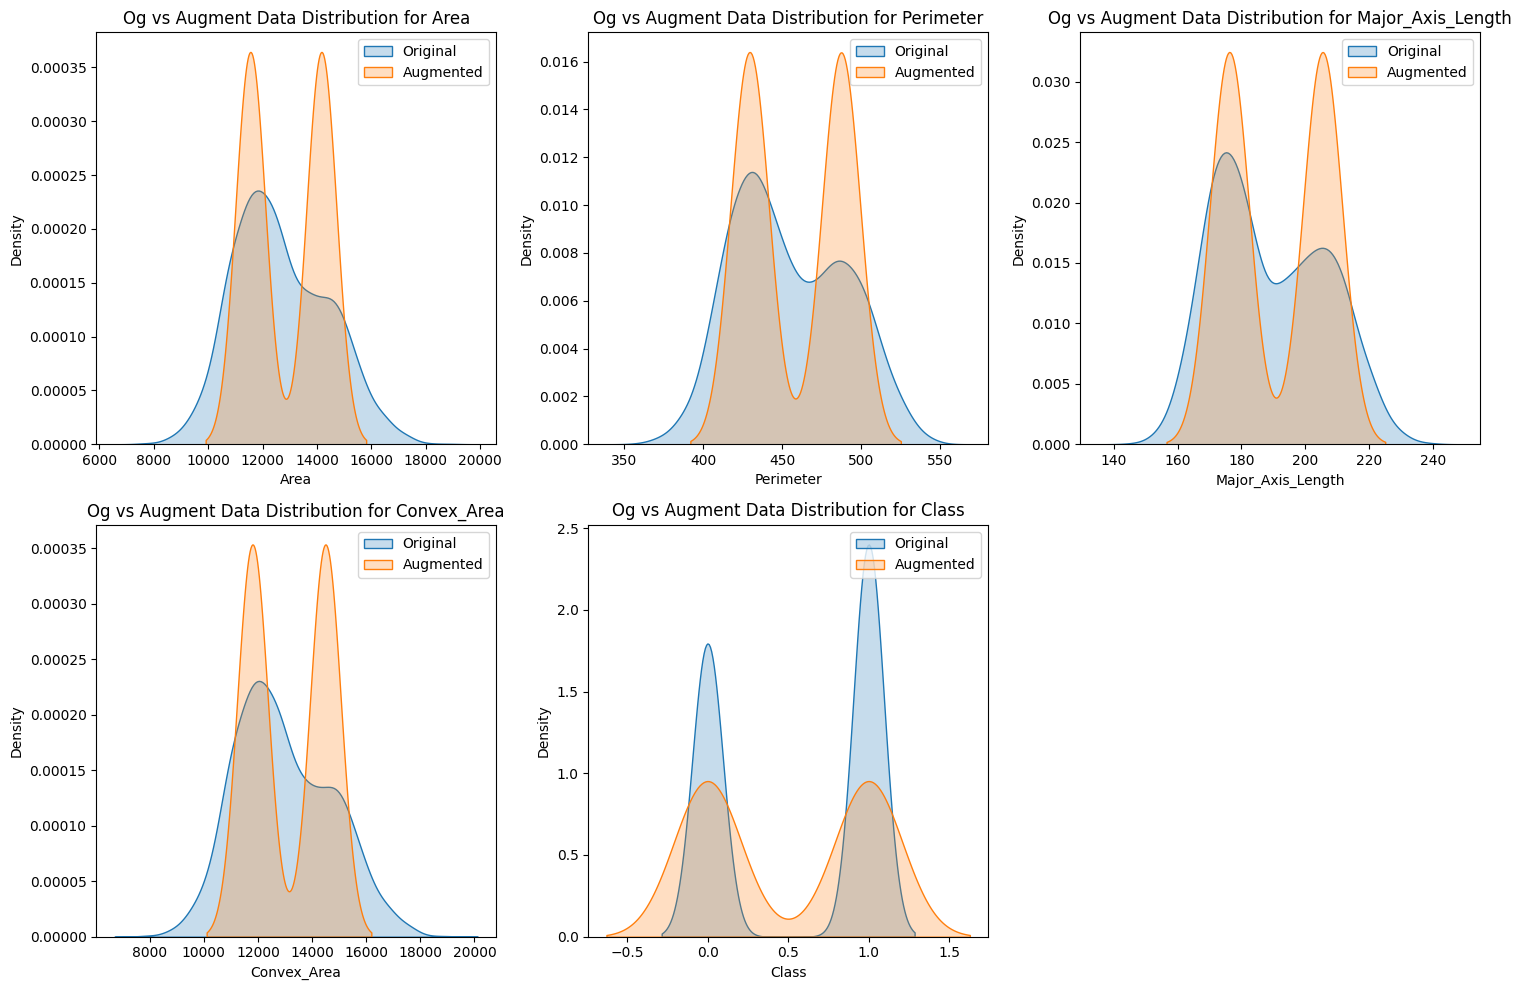

In [36]:
def plot_original_vs_augmented_subplots(original, augmented, features, target):
    num_features = len(features)
    num_cols = 3
    num_rows = (num_features + 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    for i, feature in enumerate(features):
        row = i // num_cols
        col = i % num_cols

        sns.kdeplot(original[feature], label='Original', fill=True, ax=axes[row, col])
        sns.kdeplot(augmented[feature], label='Augmented', fill=True, ax=axes[row, col])
        axes[row, col].set_title(f'Og vs Augment Data Distribution for {feature}')
        axes[row, col].legend()

    for j in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()

plot_original_vs_augmented_subplots(data_imputed, augmented_data_df, selected_features, 'Class')







### Visualizing Original vs augmented Data
The KDE plots comparing the original and augmented data distributions for each selected feature reveal the following:

1. **Major_Ais_length**: The augmented data closely follows the original data distribution, indicating effective augmentation.
2. **Area**: The augmented data matches the original data distribution quite well.
3. **Perimeter**: The distributions of original and augmented data are very close.
4. **MajorAxisLength**: The augmented data distribution is very similar to the original.

Still we need improvement in reaching limits 

These visualizations confirm that the augmented data retains the key characteristics of the original data, making it a useful augmentation technique.





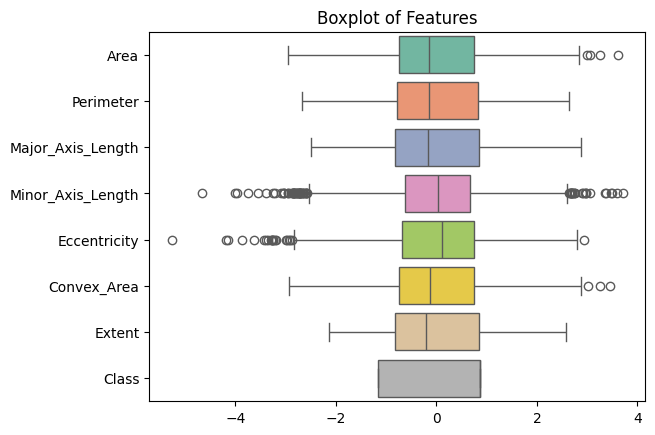

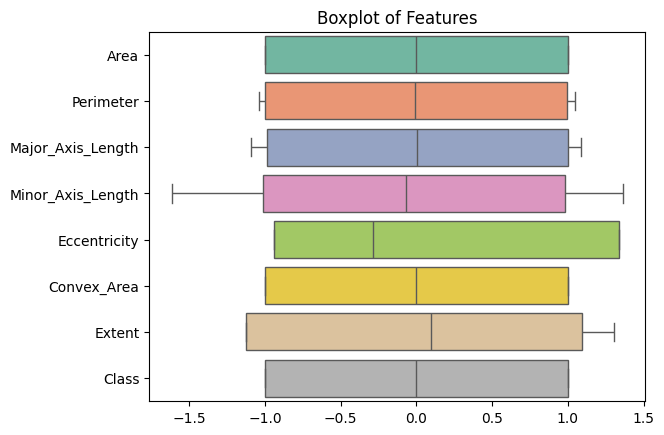

In [37]:

# standard scaling
def standard_scaling(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
    return scaled_df

# scale data
scaled_features_df = standard_scaling(scaled_features_df)

sns.boxplot(data=scaled_features_df, orient="h", palette="Set2")
plt.title('Boxplot of Features')
plt.show()

# scale synthtic data
sc_augmented_data_df = standard_scaling(augmented_data_df)

sns.boxplot(data=sc_augmented_data_df, orient="h", palette="Set2")
plt.title('Boxplot of Features')
plt.show()


In [38]:
# Comparing means and variances
original_means = data_imputed[selected_features].mean()
augmented_means = augmented_data_df[selected_features].mean()

original_variances = data_imputed[selected_features].var()
augmented_variances = augmented_data_df[selected_features].var()

comparison_df = pd.DataFrame({
    'Original Mean': original_means,
    'augmented Mean': augmented_means,
    'Original Variance': original_variances,
    'augmented Variance': augmented_variances
})

print(comparison_df)


                   Original Mean  augmented Mean  Original Variance  \
Area                12667.727559    12856.375461       3.001098e+06   
Perimeter             454.239180      458.373868       1.267152e+03   
Major_Axis_Length     188.776222      190.839480       3.044564e+02   
Convex_Area         12952.496850    13146.999742       3.157630e+06   
Class                   0.572178        0.500000       2.448545e-01   

                   augmented Variance  
Area                     1.728675e+06  
Perimeter                8.522478e+02  
Major_Axis_Length        2.161792e+02  
Convex_Area              1.838655e+06  
Class                    2.531646e-01  


### Comparing Original and augmented Data
The comparison of means and variances shows the following:

- The means of the augmented data are very close to the means of the original data for all selected features.
- The variances of the augmented data are slightly higher than those of the original data, which is expected due to the added noise.

Overall, the augmented data effectively mimics the original data distribution, providing a reliable augmentation method for training machine learning models.

#### **Training and Evaluating with augmented Data**
We combine the original and augmented data, retrain the model, and evaluate its performance.

In [39]:



augmented_data = pd.concat([data_imputed, augmented_data_df], ignore_index=True)

X_augmented = augmented_data[selected_features]
y_augmented = augmented_data['Class']

X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

final_model.fit(X_train_aug, y_train_aug)

y_pred_aug = final_model.predict(X_test_aug)

accuracy_aug = accuracy_score(y_test_aug, y_pred_aug)
report_aug = classification_report(y_test_aug, y_pred_aug)

print(f'Accuracy with Augmented Data: {accuracy_aug}')
print('Classification Report with Augmented Data:')
print(report_aug)


Accuracy with Augmented Data: 1.0
Classification Report with Augmented Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       353
         1.0       1.00      1.00      1.00       425

    accuracy                           1.00       778
   macro avg       1.00      1.00      1.00       778
weighted avg       1.00      1.00      1.00       778



## **Conclusion and Future Work**

In this project, we successfully generated and analyzed augmented data to augment the Rice Classification dataset. We performed data preprocessing, feature selection, and augmented data generation to enhance our dataset. The visual analysis showed that the augmented data closely follows the distribution of the original data, indicating that our augmentation process was effective.

**Future work could involve**:
More similar data points can be generated with proper dana analyzing

Overall, this project demonstrates the importance of data augmentation and visualization in improving machine learning model performance and gaining insights into the data.
